In [4]:
import sys
import matplotlib
!pip install pandas mlxtend networkx matplotlib seaborn
sys.path.append('../src')
from TagCombinationAnalyzer import TagCombinationAnalyzer

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
matplotlib.rcParams['axes.unicode_minus'] = False    # 正确显示负号

# 1. 初始化分析器
analyzer = TagCombinationAnalyzer('../data/processed/merged_data.csv')


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=41043) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [6]:
# 2. 挖掘高频项集
freq_itemsets = analyzer.mine_frequent_itemsets(min_support=0.02)
display(freq_itemsets.sort_values('support', ascending=False).head(10))


,support,itemsets
15,0.632967,(搞笑)
6,0.509890,(吐槽)
5,0.503297,(原创)
78,0.378022,"(搞笑, 吐槽)"
10,0.375824,(开箱)
47,0.358242,"(吐槽, 原创)"
20,0.334066,(搞笑视频)
55,0.331868,"(搞笑, 原创)"
9,0.307692,(幽默)
17,0.279121,(搞笑研究所)


In [8]:
# 3. 生成关联规则
rules = analyzer.generate_rules(min_threshold=1.1)
display(rules.sort_values('lift', ascending=False).head(10))


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2148,"(摸鱼, 搞笑)",(摸鱼事务所),0.024176,0.026374,0.021978,0.909091,34.469697,1.0,0.021340,10.709890,0.995045,0.769231,0.906628,0.871212
2149,(摸鱼事务所),"(摸鱼, 搞笑)",0.026374,0.024176,0.021978,0.833333,34.469697,1.0,0.021340,5.854945,0.997291,0.769231,0.829204,0.871212
2150,(摸鱼),"(摸鱼事务所, 搞笑)",0.030769,0.024176,0.021978,0.714286,29.545455,1.0,0.021234,3.415385,0.996825,0.666667,0.707207,0.811688
2147,"(摸鱼事务所, 搞笑)",(摸鱼),0.024176,0.030769,0.021978,0.909091,29.545455,1.0,0.021234,10.661538,0.990090,0.666667,0.906205,0.811688
239,(摸鱼),(摸鱼事务所),0.030769,0.026374,0.021978,0.714286,27.083333,1.0,0.021167,3.407692,0.993651,0.625000,0.706546,0.773810
238,(摸鱼事务所),(摸鱼),0.026374,0.030769,0.021978,0.833333,27.083333,1.0,0.021167,5.815385,0.989165,0.625000,0.828042,0.773810
12103,"(搞笑研究所, 自制, 原创)","(幽默, 沙雕视频)",0.050549,0.043956,0.021978,0.434783,9.891304,1.0,0.019756,1.691462,0.946759,0.303030,0.408796,0.467391
16377,"(吐槽, 搞笑研究所, 自制, 原创)","(幽默, 沙雕视频)",0.050549,0.043956,0.021978,0.434783,9.891304,1.0,0.019756,1.691462,0.946759,0.303030,0.408796,0.467391
16393,"(搞笑研究所, 自制, 原创)","(幽默, 吐槽, 沙雕视频)",0.050549,0.043956,0.021978,0.434783,9.891304,1.0,0.019756,1.691462,0.946759,0.303030,0.408796,0.467391
12114,"(幽默, 沙雕视频)","(搞笑研究所, 自制, 原创)",0.043956,0.050549,0.021978,0.500000,9.891304,1.0,0.019756,1.898901,0.940230,0.303030,0.473380,0.467391


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


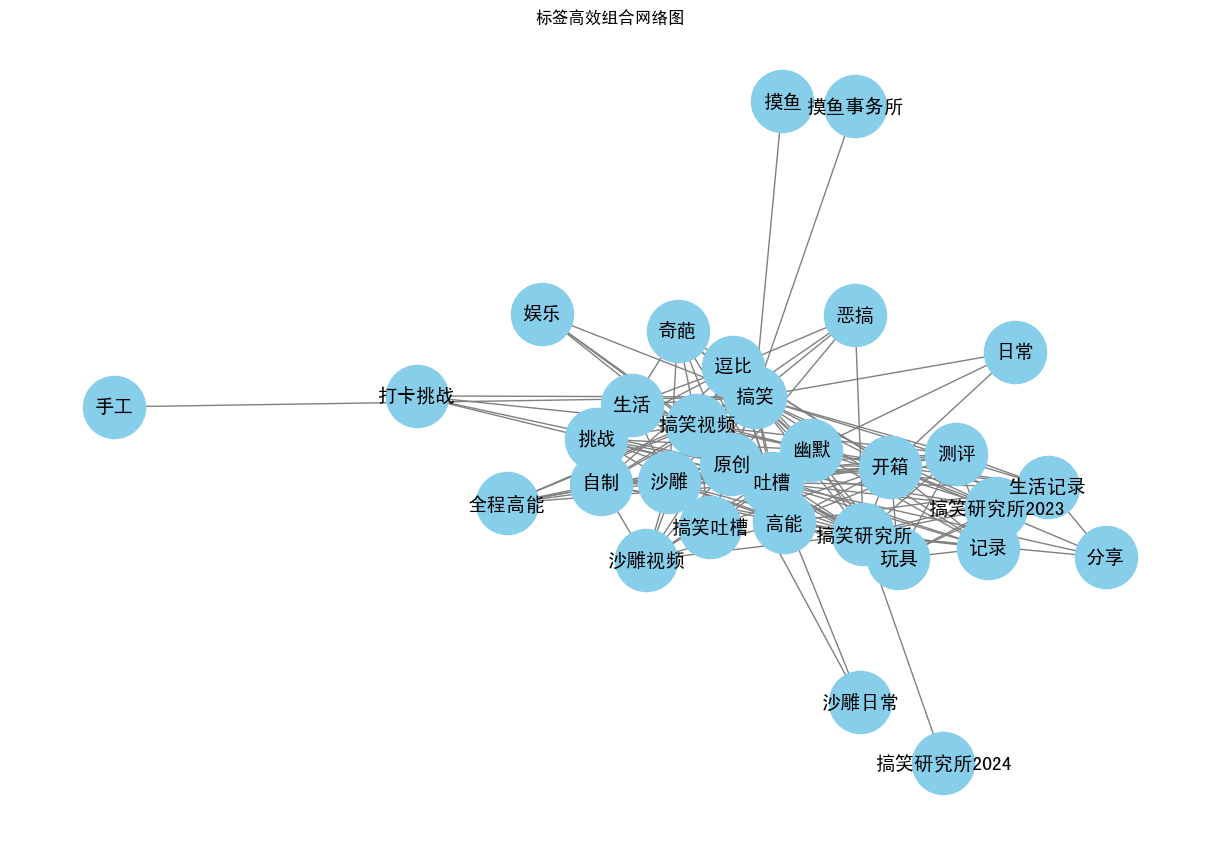

In [ ]:
# 4. 可视化高效组合
analyzer.plot_network(min_lift=1.2, min_support=0.02)
analyzer.plot_matrix(min_lift=1.2, min_support=0.02)


In [ ]:
# 5. 分析“测评–数码”等组合的播放量提升
analyzer.analyze_play_count_increase(['测评', '数码'])
analyzer.analyze_play_count_increase(['开箱', '玩具'])